----- First 5 rows -----
   monthly_charges  tenure_months  support_calls  internet_usage_gb  \
0        71.666283             24              3          98.541625   
1       145.255587              3              9          35.437672   
2        93.890047              1              1           6.113696   
3       120.277101             53              9          39.885335   
4       131.953560             44              8          99.763925   

   contract_type  churn  
0              2      0  
1              1      1  
2              1      1  
3              0      1  
4              1      1  

----- Metrics -----
Accuracy : 0.859
Precision: 0.8728632478632479
Recall   : 0.9737783075089392
F1 Score : 0.9205633802816902


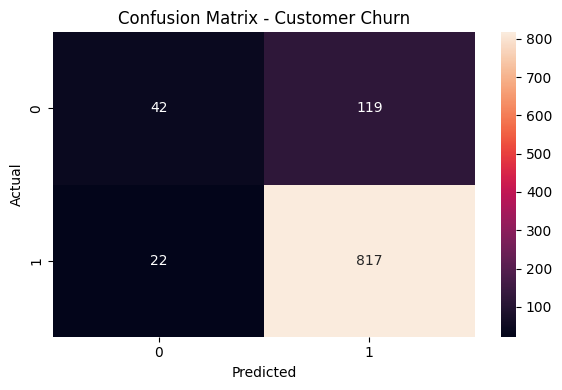

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# 1. Load the dataset
df = pd.read_csv("logistic_regression_churn_5000.csv")

print("----- First 5 rows -----")
print(df.head())

# 2. Split the features and target
# Features: use correct column names from the CSV
X = df[["monthly_charges", "tenure_months", "support_calls", "internet_usage_gb", "contract_type"]]

# Target: churn (1 = churned, 0 = stayed)
y = df["churn"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train the Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 5. Prediction
y_pred = model.predict(X_test)

# 6. Evaluation metrics
print("\n----- Metrics -----")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# 7. Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Customer Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
